In [1586]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

global companies_set 

warnings.filterwarnings('ignore')

# 1 - Pré-Processamento

## 1.1 - Acessando planilha de dataset original

In [1587]:
path = r"D:\Documentos_D\UFCG\2021.2e\TCC\Project\analise-de-indicador-tcc-ufcg\Data\indicadores_Siteware.csv"
base_df = pd.read_csv(path,sep =",")
print("\nTotal de linhas: %d linhas." % len(base_df))


Total de linhas: 8938 linhas.


## 1.2 - Filtrando e renomeando apenas as colunas necessárias para análise

In [1588]:
df = base_df[['Indicador','Dim1_Membro_Mome','Dim2_Membro_Mome','Dim3_Membro_Mome','VLR_Ocorrencia','Tipo_Registro','Data_Ocorrencia']]
df = df[df['Tipo_Registro'] == "Apurado"] #|------------> Remoção dos indicadores com "Tipo_Registro" == "acumulado"
df = df.drop(['Tipo_Registro','Indicador'],axis=1) 
df.columns = ['Empresa','Canal_Distribuicao','Mercado','Volume_Venda','Data']

print("DataFrame sem as colunas 'Tipo_Registro' e 'Indicador':")
df.head(5)

DataFrame sem as colunas 'Tipo_Registro' e 'Indicador':


,Empresa,Canal_Distribuicao,Mercado,Volume_Venda,Data
0,NaN,NaN,NaN,63198.005,2015-01-01 00:00:00.000
1,NaN,NaN,NaN,107754.000,2015-02-01 00:00:00.000
2,NaN,NaN,NaN,118044.000,2015-03-01 00:00:00.000
3,NaN,NaN,NaN,75890.000,2015-04-01 00:00:00.000
4,NaN,NaN,NaN,102560.000,2015-05-01 00:00:00.000


## 1.3 - Tratamento e remoção das linhas com NaNs que serão desconsideradas

In [1589]:
# Contando NaNs do dataframe apenas do valores do tipo_registro "Apurado" (total de 4469 linhas):
dim1_membro_mome_nan_sum = df.Empresa.isna().sum()
dim2_membro_mome_nan_sum = df.Canal_Distribuicao.isna().sum()
dim3_membro_mome_nan_sum = df.Mercado.isna().sum()
vlr_ocorrencia_nan_sum = df.Volume_Venda.isna().sum()

print("Quantidade de NaNs de empresa (Dim1_Membro_Mome): ",dim1_membro_mome_nan_sum)
print("Quantidade de NaNs de canal de distribuição (Dim2_Membro_Mome): ", dim2_membro_mome_nan_sum)
print("Quantidade de NaNs de mercado (Dim3_Membro_Mome): ", dim3_membro_mome_nan_sum)
print("Quantidade de NaNs dos volumes de venda (VLR_Ocorrencia): ", vlr_ocorrencia_nan_sum)

Quantidade de NaNs de empresa (Dim1_Membro_Mome):  1020
Quantidade de NaNs de canal de distribuição (Dim2_Membro_Mome):  756
Quantidade de NaNs de mercado (Dim3_Membro_Mome):  1416
Quantidade de NaNs dos volumes de venda (VLR_Ocorrencia):  458


In [1590]:
# Substituindo os valores NaNs pela string 'NaN':
df = df.fillna("NaN")
df.head(5)

,Empresa,Canal_Distribuicao,Mercado,Volume_Venda,Data
0,NaN,NaN,NaN,63198.005,2015-01-01 00:00:00.000
1,NaN,NaN,NaN,107754.0,2015-02-01 00:00:00.000
2,NaN,NaN,NaN,118044.0,2015-03-01 00:00:00.000
3,NaN,NaN,NaN,75890.0,2015-04-01 00:00:00.000
4,NaN,NaN,NaN,102560.0,2015-05-01 00:00:00.000


### 1.3.1 - Filtrando dataframe com apenas as linhas que possuem pelo menos Empresa (dimensão 1)

In [1591]:
df = df[((df.Empresa != "NaN") & (df.Canal_Distribuicao == "NaN") & (df.Mercado == "NaN"))
        |((df.Empresa != "NaN") & (df.Canal_Distribuicao != "NaN") & (df.Mercado == "NaN"))
        |((df.Empresa != "NaN") & (df.Canal_Distribuicao != "NaN") & (df.Mercado != "NaN"))]
df.head(5)

,Empresa,Canal_Distribuicao,Mercado,Volume_Venda,Data
48,BC,NaN,NaN,10070.0,2015-01-01 00:00:00.000
49,BC,NaN,NaN,9434.0,2015-02-01 00:00:00.000
50,BC,NaN,NaN,14882.0,2015-03-01 00:00:00.000
51,BC,NaN,NaN,12618.0,2015-04-01 00:00:00.000
52,BC,NaN,NaN,8516.0,2015-05-01 00:00:00.000


### 1.3.2 - Removendo do dataframe linhas que possuem o "Valor de Ocorrência" vazio

In [1592]:
df = df[(df.Volume_Venda != "NaN")].reset_index()

# Reconfigurando os índices:
new_index = []
for i in range(len(df)):
    new_index.append(i+1)
df = df.set_index(pd.Index(new_index))
del df['index']

# 2 - Análise Exploratória dos Dados

## 2.1 - Análise das "Empresas", dos "Canais de Distribuição" e dos "Mercados"

In [1593]:
empresas = df.Empresa.unique()
canais = df.Canal_Distribuicao.unique()
mercados = df.Mercado.unique()

print("Empresas: ", empresas)
print("Canais: ", canais)
print("Mercado: ", mercados)

Empresas:  ['BC' 'BI' 'BR' 'BT']
Canais:  ['NaN' 'ME' 'EE' 'MI']
Mercado:  ['NaN' 'Am.Norte' 'Ásia' 'Europa' 'Am.Latina' 'Japão' 'Brasil']


In [1594]:
# Substituindo os nomes dos mercados, para omitir informações possivelmente confidenciais:
df['Mercado'] = df['Mercado'].replace(['Am.Norte','Ásia','Europa','Am.Latina','Japão','Brasil'],
                                      [   'R1'   , 'R2' ,  'R3'  ,    'R4'   ,  'R5' ,  'R6'  ])

### 2.1.1 - Agrupamento de Mercados, por Canais, por Empresa

In [1595]:
group_by_empresa = df.groupby(['Empresa'])
group_by_canal = df.groupby(['Canal_Distribuicao'])
group_by_mercado = df.groupby(['Mercado'])

companies_set = [] 
# .sort_values(by=['Data_Ocorrencia'])
for company_name in empresas:
    temp_df = group_by_empresa.get_group(company_name)
    #del  empresa_df['index']
    companies_set.append((company_name, temp_df))

for tpl in companies_set:
    print(tpl[0])
    group = tpl[1].groupby(['Canal_Distribuicao','Mercado']).size()
    group = group.to_frame(name = 'Qtd')
    display(group)


BC


Qtd
Canal_Distribuicao Mercado     
ME                 NaN      121
                   R1       193
NaN                NaN      121

BI


Qtd
Canal_Distribuicao Mercado     
ME                 NaN      121
                   R2       193
                   R3       193
                   R5        65
NaN                NaN      121

BR


Qtd
Canal_Distribuicao Mercado     
EE                 NaN      121
                   R1       144
                   R2       193
                   R3       145
                   R4       131
                   R5       168
ME                 NaN      121
MI                 R6       169
NaN                NaN      121

BT


Qtd
Canal_Distribuicao Mercado     
ME                 NaN      103
                   R2       173
                   R4       127
                   R5       151
NaN                NaN      103

## 2.2 - Médias de Volume de Vendas

### 2.2.1 - BC

#### - *BC - ME - R1*

,Empresa,Canal_Distribuicao,Mercado,Volume_Venda,Data
0,BC,ME,R1,9498.0,2012-01-01 00:00:00.000
1,BC,ME,R1,9596.0,2012-02-01 00:00:00.000
2,BC,ME,R1,10424.0,2012-03-01 00:00:00.000
3,BC,ME,R1,12276.0,2012-04-01 00:00:00.000


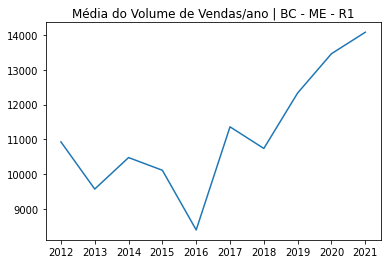

In [1596]:
cmp_df_r1 = companies_set[0][1].reset_index().drop(['index'],axis=1)
cmp_df_r1 = cmp_df_r1[((cmp_df_r1.Canal_Distribuicao == 'ME') & (cmp_df_r1.Mercado == 'R1'))]
cmp_df_r1 = cmp_df_r1[((cmp_df_r1.Empresa != "NaN") & (cmp_df_r1.Canal_Distribuicao != "NaN") & (cmp_df_r1.Mercado != "NaN"))]
cmp_df_r1 = cmp_df_r1.sort_values(by='Volume_Venda').reset_index().drop(['index'],axis=1)
cmp_df_r1 = cmp_df_r1.drop_duplicates('Data',keep='last').sort_values(by='Data').reset_index().drop(['index'],axis=1)
display(cmp_df_r1.head(4))

means_bc_me_r1 = []
year = 2012
while year < 2022: # so tem a entrada de janeiro no ano de 2022;
    query = cmp_df_r1[((cmp_df_r1.Data >= str(year)) & (cmp_df_r1.Data < str(year+1)))]
    mean = np.round(query['Volume_Venda'].mean(),4)
    means_bc_me_r1.append(mean)
    year += 1

means = means_bc_me_r1
bars = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
y_pos = np.arange(len(bars))
plt.title("Média do Volume de Vendas/ano | "+ companies_set[0][0]+" - ME - R1")
plt.plot(y_pos, means)
plt.xticks(y_pos, bars)
plt.show()

### 2.2.2 - Empresa BI

##### - *BI - ME - R2*

,Empresa,Canal_Distribuicao,Mercado,Volume_Venda,Data
0,BI,ME,R3,46478.0,2012-01-01 00:00:00.000
1,BI,ME,R3,36412.0,2012-02-01 00:00:00.000
2,BI,ME,R3,41470.0,2012-03-01 00:00:00.000
3,BI,ME,R3,39242.0,2012-04-01 00:00:00.000


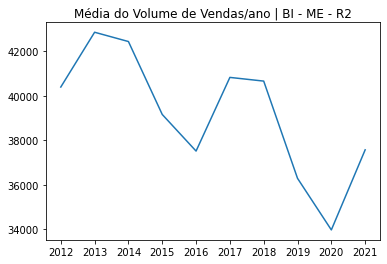

In [1597]:
cmp_df_r2 = companies_set[1][1].reset_index().drop(['index'],axis=1)
cmp_df_r2 = cmp_df_r2[((cmp_df_r2.Canal_Distribuicao == 'ME') & (cmp_df_r2.Mercado == 'R3'))]
cmp_df_r2 = cmp_df_r2[((cmp_df_r2.Empresa != "NaN") & (cmp_df_r2.Canal_Distribuicao != "NaN") & (cmp_df_r2.Mercado != "NaN"))]
cmp_df_r2 = cmp_df_r2.sort_values(by='Volume_Venda').reset_index().drop(['index'],axis=1)
cmp_df_r2 = cmp_df_r2.drop_duplicates('Data',keep='last').sort_values(by='Data').reset_index().drop(['index'],axis=1)
display(cmp_df_r2.head(4))

means_bi_me_r2 = []
year = 2012
while year < 2022: # so tem a entrada de janeiro no ano de 2022;
    query = cmp_df_r2[((cmp_df_r2.Data >= str(year)) & (cmp_df_r2.Data < str(year+1)))]
    mean = np.round(query['Volume_Venda'].mean(),4)
    means_bi_me_r2.append(mean)
    year += 1

means = means_bi_me_r2
bars = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
y_pos = np.arange(len(bars))
plt.title("Média do Volume de Vendas/ano | "+ companies_set[1][0]+" - ME - R2")
plt.plot(y_pos, means)
plt.xticks(y_pos, bars)
plt.show()

##### - *BI - ME - R3*

,Empresa,Canal_Distribuicao,Mercado,Volume_Venda,Data
0,BI,ME,R3,46478.0,2012-01-01 00:00:00.000
1,BI,ME,R3,36412.0,2012-02-01 00:00:00.000
2,BI,ME,R3,41470.0,2012-03-01 00:00:00.000
3,BI,ME,R3,39242.0,2012-04-01 00:00:00.000


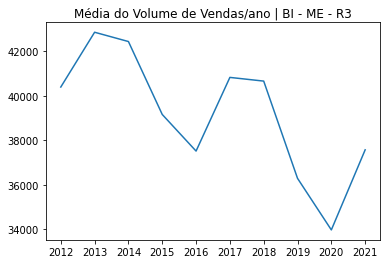

In [1598]:
cmp_df_r3 = companies_set[1][1].reset_index().drop(['index'],axis=1)
cmp_df_r3 = cmp_df_r3[((cmp_df_r3.Canal_Distribuicao == 'ME') & (cmp_df_r3.Mercado == 'R3'))]
cmp_df_r3 = cmp_df_r3[((cmp_df_r3.Empresa != "NaN") & (cmp_df_r3.Canal_Distribuicao != "NaN") & (cmp_df_r3.Mercado != "NaN"))]
cmp_df_r3 = cmp_df_r3.sort_values(by='Volume_Venda').reset_index().drop(['index'],axis=1)
cmp_df_r3 = cmp_df_r3.drop_duplicates('Data',keep='last').sort_values(by='Data').reset_index().drop(['index'],axis=1)
display(cmp_df_r3.head(4))

means_bi_me_r3 = []
year = 2012
while year < 2022: 
    query = cmp_df_r3[((cmp_df_r3.Data >= str(year)) & (cmp_df_r3.Data < str(year+1)))]
    mean = np.round(query['Volume_Venda'].mean(),4)
    means_bi_me_r3.append(mean)
    year += 1

means = means_bi_me_r3
bars = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
y_pos = np.arange(len(bars))
plt.title("Média do Volume de Vendas/ano | "+ companies_set[1][0]+" - ME - R3")
plt.plot(y_pos, means)
plt.xticks(y_pos, bars)
plt.show()

##### - *BI - ME - R5*

,Empresa,Canal_Distribuicao,Mercado,Volume_Venda,Data
0,BI,ME,R5,16810.0,2016-08-01 00:00:00.000
1,BI,ME,R5,18138.0,2016-09-01 00:00:00.000
2,BI,ME,R5,18182.0,2016-10-01 00:00:00.000
3,BI,ME,R5,19690.0,2016-11-01 00:00:00.000


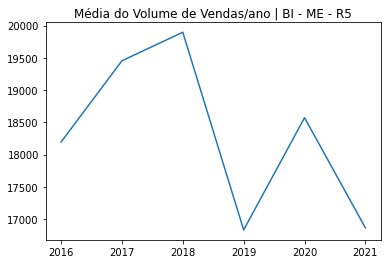

In [1599]:
cmp_df_r5 = companies_set[1][1].reset_index().drop(['index'],axis=1)
cmp_df_r5 = cmp_df_r5[((cmp_df_r5.Canal_Distribuicao == 'ME') & (cmp_df_r5.Mercado == 'R5'))]
cmp_df_r5 = cmp_df_r5[((cmp_df_r5.Empresa != "NaN") & (cmp_df_r5.Canal_Distribuicao != "NaN") & (cmp_df_r5.Mercado != "NaN"))]
cmp_df_r5 = cmp_df_r5.sort_values(by='Volume_Venda').reset_index().drop(['index'],axis=1)
cmp_df_r5 = cmp_df_r5.drop_duplicates('Data',keep='last').sort_values(by='Data').reset_index().drop(['index'],axis=1)
display(cmp_df_r5.head(4))

means_bi_me_r5 = []
year = 2016
while year < 2022: 
    query = cmp_df_r5[((cmp_df_r5.Data >= str(year)) & (cmp_df_r5.Data < str(year+1)))]
    mean = np.round(query['Volume_Venda'].mean(),4)
    means_bi_me_r5.append(mean)
    year += 1

means = means_bi_me_r5
bars = ['2016','2017','2018','2019','2020','2021']
y_pos = np.arange(len(bars))
plt.title("Média do Volume de Vendas/ano | "+ companies_set[1][0]+" - ME - R5")
plt.plot(y_pos, means)
plt.xticks(y_pos, bars)
plt.show()

##### --- *Correlação ME X R2 X R3 X R5*

,Volume_Venda_R2,Volume_Venda_R3,Volume_Venda_R5,Volume_Venda_ME
0,9498.0,46478.0,16810.0,51866.0
1,9596.0,36412.0,18138.0,50638.0
2,10424.0,41470.0,18182.0,62968.0
3,12276.0,39242.0,19690.0,43852.0
4,11616.0,32868.0,18146.0,43012.0


<AxesSubplot:title={'center':'Matriz de Confusão: ME x R2 x R3 x R5'}>

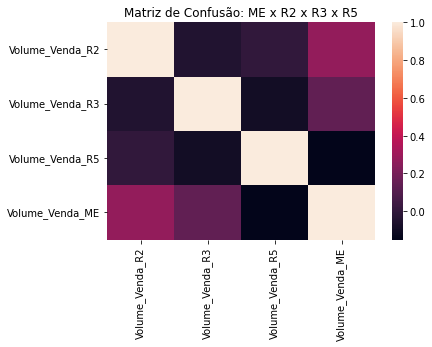

In [1600]:
cmp_df = companies_set[1][1].reset_index().drop(['index'],axis=1)
cmp_df = cmp_df[(cmp_df.Canal_Distribuicao == 'ME')]
cmp_df = cmp_df[((cmp_df.Empresa != "NaN") & (cmp_df.Canal_Distribuicao != "NaN") & (cmp_df.Mercado == "NaN"))]
cmp_df = cmp_df.sort_values(by='Volume_Venda', ascending=True)
cmp_df = cmp_df.drop_duplicates('Data',keep='last').reset_index().drop(['index'],axis=1)
cmp_df = cmp_df.sort_values(by='Data').reset_index().drop(['index'],axis=1)

new_df = pd.DataFrame()
new_df['Volume_Venda_R2'] = cmp_df_r1['Volume_Venda']
new_df['Volume_Venda_R3'] = cmp_df_r2['Volume_Venda']
new_df['Volume_Venda_R5'] = cmp_df_r5['Volume_Venda']
new_df['Volume_Venda_ME'] = cmp_df['Volume_Venda']
new_df['Data'] = cmp_df['Data']
new_df = new_df[((new_df.Volume_Venda_R2 != 0) | (new_df.Volume_Venda_R3 != 0) | (new_df.Volume_Venda_R5 != 0) 
                | (new_df.Volume_Venda_ME != 0))]
new_df = new_df.drop(['Data'],axis=1)
new_df = new_df.astype(float)

display(new_df.head(5))

plt.title("Matriz de Confusão: ME x R2 x R3 x R5")
sns.heatmap(new_df.corr())

### 2.2.2 - Empresa BR

#### - Canal de Distribuição: EE

##### --- Mercado: *R1*

,Empresa,Canal_Distribuicao,Mercado,Volume_Venda,Data
0,BR,EE,R1,0.0,2012-01-01 00:00:00.000
1,BR,EE,R1,13000.0,2012-02-01 00:00:00.000
2,BR,EE,R1,13000.0,2012-03-01 00:00:00.000
3,BR,EE,R1,9000.0,2012-04-01 00:00:00.000


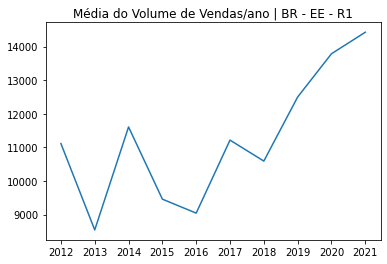

In [1601]:
cmp_df_r1 = companies_set[2][1]
cmp_df_r1 = cmp_df_r1[(cmp_df_r1.Canal_Distribuicao == 'EE') & (cmp_df_r1.Mercado == "R1") ]
cmp_df_r1 = cmp_df_r1[((cmp_df_r1.Empresa != "NaN") & (cmp_df_r1.Canal_Distribuicao != "NaN") & (cmp_df_r1.Mercado != "NaN"))]
cmp_df_r1 = cmp_df_r1.sort_values(by='Volume_Venda').reset_index().drop(['index'],axis=1)
cmp_df_r1 = cmp_df_r1.drop_duplicates('Data',keep='last').sort_values(by='Data').reset_index().drop(['index'],axis=1)
display(cmp_df_r1.head(4))

means_br_ee_r1 = []
year = 2012
while year < 2022: 
    query = cmp_df_r1[((cmp_df_r1.Data >= str(year)) & (cmp_df_r1.Data < str(year+1)))]
    mean = np.round(query['Volume_Venda'].mean(),4)
    means_br_ee_r1.append(mean)
    year += 1

means = means_br_ee_r1
bars = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
y_pos = np.arange(len(bars))
plt.title("Média do Volume de Vendas/ano | "+ companies_set[2][0]+" - EE - R1")
plt.plot(y_pos, means)
plt.xticks(y_pos, bars)
plt.show()

##### --- Mercado: *R2*

,Empresa,Canal_Distribuicao,Mercado,Volume_Venda,Data
0,BR,EE,R2,18362.0,2012-01-01 00:00:00.000
1,BR,EE,R2,10380.0,2012-02-01 00:00:00.000
2,BR,EE,R2,36076.0,2012-03-01 00:00:00.000
3,BR,EE,R2,4594.0,2012-04-01 00:00:00.000


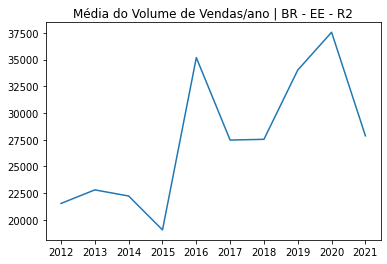

In [1602]:
cmp_df_r2 = companies_set[2][1]
cmp_df_r2 = cmp_df_r2[(cmp_df_r2.Canal_Distribuicao == 'EE') & (cmp_df_r2.Mercado == "R2") ]
cmp_df_r2 = cmp_df_r2[((cmp_df_r2.Empresa != "NaN") & (cmp_df_r2.Canal_Distribuicao != "NaN") & (cmp_df_r2.Mercado != "NaN"))]
cmp_df_r2 = cmp_df_r2.sort_values(by='Volume_Venda').reset_index().drop(['index'],axis=1)
cmp_df_r2 = cmp_df_r2.drop_duplicates('Data',keep='last').sort_values(by='Data').reset_index().drop(['index'],axis=1)
display(cmp_df_r2.head(4))

means_br_ee_r2 = []
year = 2012
while year < 2022: 
    query = cmp_df_r2[((cmp_df_r2.Data >= str(year)) & (cmp_df_r2.Data < str(year+1)))]
    mean = np.round(query['Volume_Venda'].mean(),4)
    means_br_ee_r2.append(mean)
    year += 1
    
means = means_br_ee_r2
bars = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
y_pos = np.arange(len(bars))
plt.title("Média do Volume de Vendas/ano | "+ companies_set[2][0]+" - EE - R2")
plt.plot(y_pos, means)
plt.xticks(y_pos, bars)
plt.show()

##### --- Mercado: *R3*

,Empresa,Canal_Distribuicao,Mercado,Volume_Venda,Data
0,BR,EE,R3,44852.0,2012-01-01 00:00:00.000
1,BR,EE,R3,39004.0,2012-02-01 00:00:00.000
2,BR,EE,R3,35560.0,2012-03-01 00:00:00.000
3,BR,EE,R3,39548.0,2012-04-01 00:00:00.000


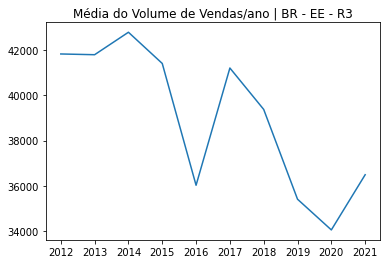

In [1603]:
cmp_df_r3 = companies_set[2][1]
cmp_df_r3 = cmp_df_r3[(cmp_df_r3.Canal_Distribuicao == 'EE') & (cmp_df_r3.Mercado == "R3") ]
cmp_df_r3 = cmp_df_r3[((cmp_df_r3.Empresa != "NaN") & (cmp_df_r3.Canal_Distribuicao != "NaN") & (cmp_df_r3.Mercado != "NaN"))]
cmp_df_r3 = cmp_df_r3.sort_values(by='Volume_Venda').reset_index().drop(['index'],axis=1)
cmp_df_r3 = cmp_df_r3.drop_duplicates('Data',keep='last').sort_values(by='Data').reset_index().drop(['index'],axis=1)
display(cmp_df_r3.head(4))

means_br_ee_r3 = []
year = 2012
while year < 2022:
    query = cmp_df_r3[((cmp_df_r3.Data >= str(year)) & (cmp_df_r3.Data < str(year+1)))]
    mean = np.round(query['Volume_Venda'].mean(),4)
    means_br_ee_r3.append(mean)
    year += 1
    
#--- Plotando o Gráfico ---#
means = means_br_ee_r3
bars = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
y_pos = np.arange(len(bars))
plt.title("Média do Volume de Vendas/ano | "+ companies_set[2][0]+" - EE - R3")
plt.plot(y_pos, means)
plt.xticks(y_pos, bars)
plt.show()

##### --- Mercado: *R4*

,Empresa,Canal_Distribuicao,Mercado,Volume_Venda,Data
0,BR,EE,R4,624.0,2012-01-01 00:00:00.000
1,BR,EE,R4,624.0,2012-02-01 00:00:00.000
2,BR,EE,R4,1118.0,2012-03-01 00:00:00.000
3,BR,EE,R4,312.0,2012-04-01 00:00:00.000


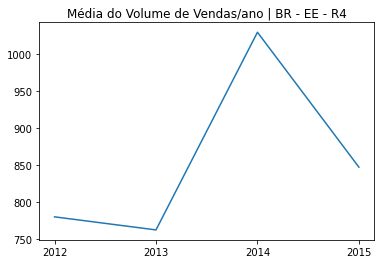

In [1604]:
cmp_df_r4 = companies_set[2][1]
cmp_df_r4 = cmp_df_r4[(cmp_df_r4.Canal_Distribuicao == 'EE') & (cmp_df_r4.Mercado == "R4") ]
cmp_df_r4 = cmp_df_r4[((cmp_df_r4.Empresa != "NaN") & (cmp_df_r4.Canal_Distribuicao != "NaN") & (cmp_df_r4.Mercado != "NaN"))]
cmp_df_r4 = cmp_df_r4.sort_values(by='Volume_Venda').reset_index().drop(['index'],axis=1)
cmp_df_r4 = cmp_df_r4.drop_duplicates('Data',keep='last').sort_values(by='Data').reset_index().drop(['index'],axis=1)
display(cmp_df_r4.head(4))

means_br_ee_r4 = []
year = 2012
while year < 2016: # So tem ate 01 Janeiro de 2016. Desconsiderei 2016;
    query = cmp_df_r4[((cmp_df_r4.Data >= str(year)) & (cmp_df_r4.Data < str(year+1)))]
    mean = np.round(query['Volume_Venda'].mean(),4)
    means_br_ee_r4.append(mean)
    year += 1
    
means = means_br_ee_r4
bars = ['2012','2013','2014','2015']
y_pos = np.arange(len(bars))
plt.title("Média do Volume de Vendas/ano | "+ companies_set[2][0]+" - EE - R4")
plt.plot(y_pos, means)
plt.xticks(y_pos, bars)
plt.show()

##### --- Mercado: *R5*

,Empresa,Canal_Distribuicao,Mercado,Volume_Venda,Data
0,BR,EE,R5,19852.0,2012-01-01 00:00:00.000
1,BR,EE,R5,29182.0,2012-02-01 00:00:00.000
2,BR,EE,R5,26186.0,2012-03-01 00:00:00.000
3,BR,EE,R5,0.0,2012-04-01 00:00:00.000


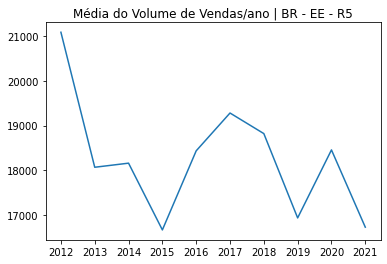

In [1605]:
cmp_df_r5 = companies_set[2][1]
cmp_df_r5 = cmp_df_r5[(cmp_df_r5.Canal_Distribuicao == 'EE') & (cmp_df_r5.Mercado == "R5")]
cmp_df_r5 = cmp_df_r5[((cmp_df_r5.Empresa != "NaN") & (cmp_df_r5.Canal_Distribuicao != "NaN") & (cmp_df_r5.Mercado != "NaN"))] 
cmp_df_r5 = cmp_df_r5.sort_values(by='Volume_Venda').reset_index().drop(['index'],axis=1)
cmp_df_r5 = cmp_df_r5.drop_duplicates('Data',keep='last').sort_values(by='Data').reset_index().drop(['index'],axis=1)
display(cmp_df_r5.head(4))

means_br_ee_r5 = []
year = 2012
while year < 2022:
    query = cmp_df_r5[((cmp_df_r5.Data >= str(year)) & (cmp_df_r5.Data < str(year+1)))]
    mean = np.round(query['Volume_Venda'].mean(),4)
    means_br_ee_r5.append(mean)
    year += 1

means = means_br_ee_r5
bars = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
y_pos = np.arange(len(bars))
plt.title("Média do Volume de Vendas/ano | "+ companies_set[2][0]+" - EE - R5")
plt.plot(y_pos, means)
plt.xticks(y_pos, bars)
plt.show()

##### - *Correlação EE X R1 X R2 X R3 x R4 x R5*

,Volume_Venda_R1,Volume_Venda_R2,Volume_Venda_R3,Volume_Venda_R4,Volume_Venda_R5,Volume_Venda_EE
0,0.0,18362.0,44852.0,624.0,19852.0,83690.0
1,13000.0,10380.0,39004.0,624.0,29182.0,92190.0
2,13000.0,36076.0,35560.0,1118.0,26186.0,111940.0
3,9000.0,4594.0,39548.0,312.0,0.0,53454.0
4,11330.0,21334.0,31766.0,1664.0,49344.0,115438.0


<AxesSubplot:title={'center':'Matriz de Confusão: EE x R1 x R2 x R3 x R4 x R5'}>

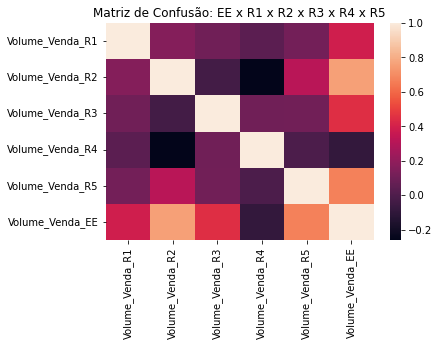

In [1606]:
cmp_df = companies_set[2][1].reset_index().drop(['index'],axis=1)
cmp_df = cmp_df[(cmp_df.Canal_Distribuicao == 'EE')]
cmp_df = cmp_df[((cmp_df.Empresa != "NaN") & (cmp_df.Canal_Distribuicao != "NaN") & (cmp_df.Mercado == "NaN"))]
cmp_df = cmp_df.sort_values(by='Volume_Venda', ascending=True)
cmp_df = cmp_df.drop_duplicates('Data',keep='last').reset_index().drop(['index'],axis=1)
cmp_df = cmp_df.sort_values(by='Data').reset_index().drop(['index'],axis=1)

new_df = pd.DataFrame()
new_df['Volume_Venda_R1'] = cmp_df_r1['Volume_Venda']
new_df['Volume_Venda_R2'] = cmp_df_r2['Volume_Venda']
new_df['Volume_Venda_R3'] = cmp_df_r3['Volume_Venda']
new_df['Volume_Venda_R4'] = cmp_df_r4['Volume_Venda']
new_df['Volume_Venda_R5'] = cmp_df_r5['Volume_Venda']
new_df['Volume_Venda_EE'] = cmp_df['Volume_Venda']
new_df['Data'] = cmp_df['Data']
new_df = new_df[((new_df.Volume_Venda_R1 != 0) | (new_df.Volume_Venda_R2 != 0) | (new_df.Volume_Venda_R3 != 0) |
                (new_df.Volume_Venda_R4 != 0) | (new_df.Volume_Venda_R5 != 0) | (new_df.Volume_Venda_EE != 0))]
new_df = new_df.drop(['Data'],axis=1)
new_df = new_df.astype(float)

display(new_df.head(5))

plt.title("Matriz de Confusão: EE x R1 x R2 x R3 x R4 x R5")
sns.heatmap(new_df.corr())

#### - Canal de Distribuição: ME

##### --- Mercado: *No region*

,Empresa,Canal_Distribuicao,Mercado,Volume_Venda,Data
0,BR,ME,NaN,83690.0,2012-01-01 00:00:00.000
1,BR,ME,NaN,92190.0,2012-02-01 00:00:00.000
2,BR,ME,NaN,111940.0,2012-03-01 00:00:00.000
3,BR,ME,NaN,53454.0,2012-04-01 00:00:00.000


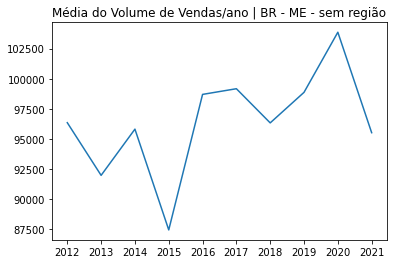

In [1607]:
cmp_df_nr = companies_set[2][1]
cmp_df_nr = cmp_df_nr[((cmp_df_nr.Canal_Distribuicao == 'ME') & (cmp_df_nr.Mercado == "NaN"))]
cmp_df_nr = cmp_df_nr[((cmp_df_nr.Empresa != "NaN") & (cmp_df_nr.Canal_Distribuicao != "NaN") & (cmp_df_nr.Mercado == "NaN"))] 
cmp_df_nr = cmp_df_nr.sort_values(by='Volume_Venda').reset_index().drop(['index'],axis=1)
cmp_df_nr = cmp_df_nr.drop_duplicates('Data',keep='last').sort_values(by='Data').reset_index().drop(['index'],axis=1)
display(cmp_df_nr.head(4))

means_br_me = []
year = 2012
while year < 2022:
    query = cmp_df_nr[((cmp_df_nr.Data >= str(year)) & (cmp_df_nr.Data < str(year+1)))]
    mean = np.round(query['Volume_Venda'].mean(),4)
    means_br_me.append(mean)
    year += 1

means = means_br_me
bars = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
y_pos = np.arange(len(bars))
plt.title("Média do Volume de Vendas/ano | " + companies_set[2][0]+" - ME - sem região")
plt.plot(y_pos, means)
plt.xticks(y_pos, bars)
plt.show()

#### - Canal de Distribuição: MI

##### --- Mercado: *R6*

,Empresa,Canal_Distribuicao,Mercado,Volume_Venda,Data
0,BR,MI,R6,4598.001,2012-01-01 00:00:00.000
1,BR,MI,R6,4192.0,2012-02-01 00:00:00.000
2,BR,MI,R6,4664.0,2012-03-01 00:00:00.000
3,BR,MI,R6,4584.0,2012-04-01 00:00:00.000


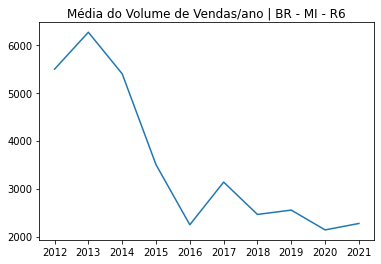

In [1608]:
cmp_df_r6 = companies_set[2][1].reset_index().drop(['index'],axis=1)
cmp_df_r6 = cmp_df_r6[((cmp_df_r6.Canal_Distribuicao == 'MI') & (cmp_df_r6.Mercado == 'R6'))]
cmp_df_r6 = cmp_df_r6[((cmp_df_r6.Empresa != "NaN") & (cmp_df_r6.Canal_Distribuicao != "NaN") & (cmp_df_r6.Mercado != "NaN"))]
cmp_df_r6 = cmp_df_r6.sort_values(by='Volume_Venda').reset_index().drop(['index'],axis=1)
cmp_df_r6 = cmp_df_r6.drop_duplicates('Data',keep='last').sort_values(by='Data').reset_index().drop(['index'],axis=1)
display(cmp_df_r6.head(4))

means_br_mi_r6 = []
year = 2012
while year < 2022:
    query = cmp_df_r6[((cmp_df_r6.Data >= str(year)) & (cmp_df_r6.Data < str(year+1)))]
    mean = np.round(query['Volume_Venda'].mean(),4)
    means_br_mi_r6.append(mean)
    year += 1

means = means_br_mi_r6
bars = ['2012','2013','2014','2015','2016','2017','2018','2019','2020','2021']
y_pos = np.arange(len(bars))
plt.title("Média do Volume de Vendas/ano | "+ companies_set[2][0]+" - MI - R6")
plt.plot(y_pos, means)
plt.xticks(y_pos, bars)
plt.show()

### 2.2.4 - Empresa BT

#### - Canal de Distribuição: ME

##### --- Mercado: *R2*

,Empresa,Canal_Distribuicao,Mercado,Volume_Venda,Data
0,BT,ME,R2,4214.0,2012-01-01 00:00:00.000
1,BT,ME,R2,2304.0,2012-02-01 00:00:00.000
2,BT,ME,R2,9504.0,2012-03-01 00:00:00.000
3,BT,ME,R2,3708.0,2012-04-01 00:00:00.000


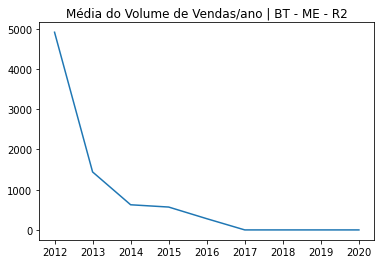

In [1609]:
cmp_df_r2 = companies_set[3][1].reset_index().drop(['index'],axis=1)
cmp_df_r2 = cmp_df_r2[((cmp_df_r2.Canal_Distribuicao == 'ME') & (cmp_df_r2.Mercado == 'R2'))]
cmp_df_r2 = cmp_df_r2[((cmp_df_r2.Empresa != "NaN") & (cmp_df_r2.Canal_Distribuicao != "NaN") & (cmp_df_r2.Mercado != "NaN"))]
cmp_df_r2 = cmp_df_r2.sort_values(by='Volume_Venda').reset_index().drop(['index'],axis=1)
cmp_df_r2 = cmp_df_r2.drop_duplicates('Data',keep='last').sort_values(by='Data').reset_index().drop(['index'],axis=1)
display(cmp_df_r2.head(4))

means_bt_me_r2 = []
year = 2012
while year < 2021:
    query = cmp_df_r2[((cmp_df_r2.Data >= str(year)) & (cmp_df_r2.Data < str(year+1)))]
    mean = np.round(query['Volume_Venda'].mean(),4)
    means_bt_me_r2.append(mean)
    year += 1

means = means_bt_me_r2
bars = ['2012','2013','2014','2015','2016','2017','2018','2019','2020']
y_pos = np.arange(len(bars))
plt.title("Média do Volume de Vendas/ano | "+ companies_set[3][0]+" - ME - R2")
plt.plot(y_pos, means)
plt.xticks(y_pos, bars)
plt.show()

##### --- Mercado: *R4*

,Empresa,Canal_Distribuicao,Mercado,Volume_Venda,Data
0,BT,ME,R4,1014.0,2012-01-01 00:00:00.000
1,BT,ME,R4,624.0,2012-02-01 00:00:00.000
2,BT,ME,R4,624.0,2012-03-01 00:00:00.000
3,BT,ME,R4,806.0,2012-04-01 00:00:00.000


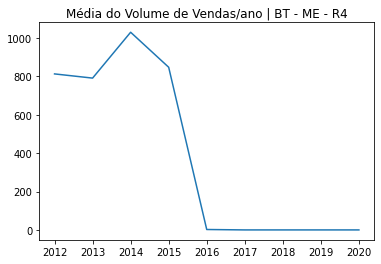

In [1610]:
cmp_df_r4 = companies_set[3][1].reset_index().drop(['index'],axis=1)
cmp_df_r4 = cmp_df_r4[((cmp_df_r4.Canal_Distribuicao == 'ME') & (cmp_df_r4.Mercado == 'R4'))] # só vai ate 07/2020
cmp_df_r4 = cmp_df_r4[((cmp_df_r4.Empresa != "NaN") & (cmp_df_r4.Canal_Distribuicao != "NaN") & (cmp_df_r4.Mercado != "NaN"))]
cmp_df_r4 = cmp_df_r4.sort_values(by='Volume_Venda').reset_index().drop(['index'],axis=1)
cmp_df_r4 = cmp_df_r4.drop_duplicates('Data',keep='last').sort_values(by='Data').reset_index().drop(['index'],axis=1)
display(cmp_df_r4.head(4))

means_bt_me_r4 = []
year = 2012
while year < 2021:
    query = cmp_df_r4[((cmp_df_r4.Data >= str(year)) & (cmp_df_r4.Data < str(year+1)))]
    mean = np.round(query['Volume_Venda'].mean(),4)
    means_bt_me_r4.append(mean)
    year += 1

means = means_bt_me_r4
bars = ['2012','2013','2014','2015','2016','2017','2018','2019','2020']
y_pos = np.arange(len(bars))

plt.title("Média do Volume de Vendas/ano | "+ companies_set[3][0]+" - ME - R4")
plt.plot(y_pos, means)
plt.xticks(y_pos, bars)
plt.show()

##### --- Mercado: *R5*

,Empresa,Canal_Distribuicao,Mercado,Volume_Venda,Data
0,BT,ME,R5,18864.0,2012-01-01 00:00:00.000
1,BT,ME,R5,30170.0,2012-02-01 00:00:00.000
2,BT,ME,R5,26186.0,2012-03-01 00:00:00.000
3,BT,ME,R5,0.0,2012-04-01 00:00:00.000


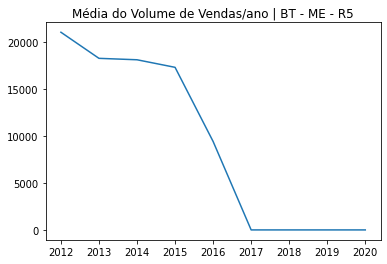

In [1611]:
cmp_df_r5 = companies_set[3][1].reset_index().drop(['index'],axis=1)
cmp_df_r5 = cmp_df_r5[((cmp_df_r5.Canal_Distribuicao == 'ME') & (cmp_df_r5.Mercado == 'R5'))] # só vai ate 07/2020
cmp_df_r5 = cmp_df_r5[((cmp_df_r5.Empresa != "NaN") & (cmp_df_r5.Canal_Distribuicao != "NaN") & (cmp_df_r5.Mercado != "NaN"))]
cmp_df_r5 = cmp_df_r5.sort_values(by='Volume_Venda').reset_index().drop(['index'],axis=1)
cmp_df_r5 = cmp_df_r5.drop_duplicates('Data',keep='last').sort_values(by='Data').reset_index().drop(['index'],axis=1)
display(cmp_df_r5.head(4))

means_bt_me_r5 = []
year = 2012
while year < 2021:
    query = cmp_df_r5[((cmp_df_r5.Data >= str(year)) & (cmp_df_r5.Data < str(year+1)))]
    mean = np.round(query['Volume_Venda'].mean(),4)
    means_bt_me_r5.append(mean)
    year += 1

means = means_bt_me_r5
bars = ['2012','2013','2014','2015','2016','2017','2018','2019','2020']
y_pos = np.arange(len(bars))

plt.title("Média do Volume de Vendas/ano | "+ companies_set[3][0]+" - ME - R5")
plt.plot(y_pos, means)
plt.xticks(y_pos, bars)
plt.show()

##### - *Correlação ME X R2 X R4 X R5*

,Empresa,Canal_Distribuicao,Mercado,Volume_Venda,Data
0,BT,ME,NaN,24092.0,2012-01-01 00:00:00.000
1,BT,ME,NaN,33098.0,2012-02-01 00:00:00.000
2,BT,ME,NaN,36314.0,2012-03-01 00:00:00.000
3,BT,ME,NaN,4514.0,2012-04-01 00:00:00.000


<AxesSubplot:title={'center':'Matriz de Confusão: ME X R2 X R4 X R5'}>

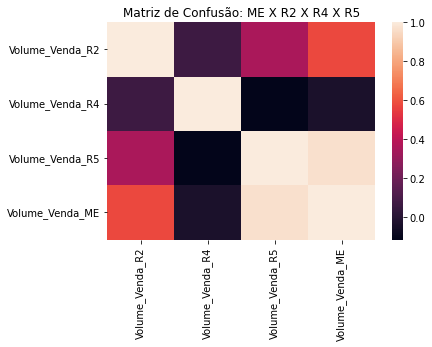

In [1612]:
cmp_df = companies_set[3][1].reset_index().drop(['index'],axis=1)
cmp_df = cmp_df[((cmp_df.Empresa != "NaN") & (cmp_df.Canal_Distribuicao != "NaN") & (cmp_df.Mercado == "NaN"))]
cmp_df = cmp_df.sort_values(by='Volume_Venda').reset_index().drop(['index'],axis=1)
cmp_df = cmp_df.drop_duplicates('Data',keep='last').sort_values(by='Data').reset_index().drop(['index'],axis=1)
display(cmp_df.head(4))

new_df = pd.DataFrame()
new_df['Volume_Venda_R2'] = cmp_df_r2['Volume_Venda']
new_df['Volume_Venda_R4'] = cmp_df_r4['Volume_Venda']
new_df['Volume_Venda_R5'] = cmp_df_r5['Volume_Venda']
new_df['Volume_Venda_ME'] = cmp_df['Volume_Venda']
new_df['Data'] = cmp_df['Data']
new_df = new_df[((new_df.Volume_Venda_R2 != 0) | (new_df.Volume_Venda_R4 != 0) | (new_df.Volume_Venda_R5 != 0) |
                (new_df.Volume_Venda_ME != 0))]
new_df = new_df.drop(['Data'],axis=1)
new_df = new_df.astype(float)
plt.title("Matriz de Confusão: ME X R2 X R4 X R5")
sns.heatmap(new_df.corr())